In [2]:
%load_ext autoreload
%autoreload 2
import utils
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing.dummy import Pool as ThreadPool
from tqdm import tqdm
from multiprocessing import Pool

In [22]:
event_data = np.loadtxt("./data/events.txt")
position_data = np.loadtxt("./data/groundtruth.txt")

In [91]:
t_start = 1.0
duration = 0.2
# 
img_height = 180
img_width = 240
depth_img = np.zeros((img_height, img_width))
depth_img.shape

(180, 240)

In [92]:
%%time
events_range = utils.get_events_range(event_data, t_start, duration)
def process_height(row):
    events = utils.get_events_in_row(events_range, row)
    
    accumulator = utils.create_accumulator()
    utils.process_row_data(events, position_data, accumulator)
    accumulator_thresh = utils.threshold_accumulator(accumulator, 30)
    params = utils.get_pol_of_positives(accumulator_thresh)
    
    pos = position_data[int(len(position_data)/10*8)][1]
    
    depth = utils.get_image_depths(params, pos, events, position_data)
    
    depth_img[row, :] = depth
    

Wall time: 8.5 ms


In [93]:
%%time
for i in tqdm(range(0, img_height, 2)):
    process_height(i)

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [02:29<00:00,  1.66s/it]

Wall time: 2min 29s


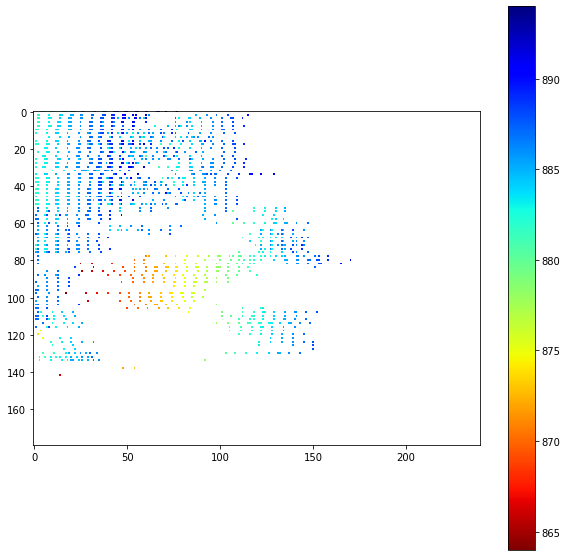

In [94]:
img = np.array(depth_img)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

a = np.ma.masked_where(img == 0, img)

# cmap = plt.cm.OrRd

# for mpl 3.3 and higher use
cmap = plt.cm.get_cmap("jet_r").copy()

cmap.set_bad(color='white')

mappable = im = plt.imshow(a, interpolation='none', cmap=cmap)
fig.colorbar(mappable)

In [74]:
%lprun?

Object `%lprun` not found.


In [ ]:
depth_img_norm = np.copy(depth_img)

In [ ]:
depth_img_norm = (depth_img_norm - depth_img_norm.min()) / (depth_img_norm.max() - depth_img_norm.min()) * 256

In [ ]:
plt.imshow(depth_img_norm, cmap="plasma_r")

In [ ]:
depth_img_norm.shape

In [73]:
def process_height_multi(row):
    events_range = utils.get_events_range(event_data, t_start, duration)
    events = utils.get_events_in_row(events_range, row)
    
    accumulator = utils.create_accumulator()
    utils.process_row_data(events, position_data, accumulator)
    accumulator_thresh = utils.threshold_accumulator(accumulator, 50)
    params = utils.get_pol_of_positives(accumulator_thresh)
    
    pos = position_data[int(len(position_data)/2)][1]
    
    depth = utils.get_image_depths(params, pos, events, position_data)
    return depth

In [74]:
%%time
pool = ThreadPool(8)
depth_img_multi = []
depth_img_multi = pool.map(process_height_multi, range(0, img_height, 1))

Wall time: 4min 29s


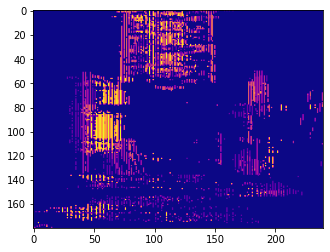

In [75]:
plt.imshow(depth_img_multi, cmap="plasma")

In [76]:
img = np.array(depth_img_multi)

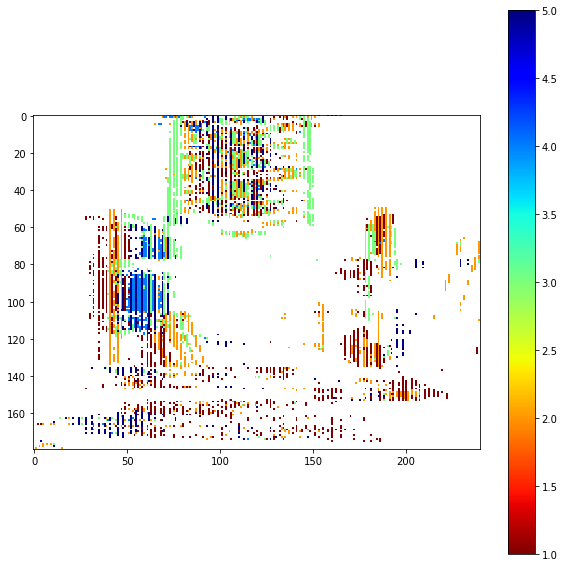

In [77]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

a = np.ma.masked_where(img == 0, img)

# cmap = plt.cm.OrRd

# for mpl 3.3 and higher use
cmap = plt.cm.get_cmap("jet_r").copy()

cmap.set_bad(color='white')

mappable = im = plt.imshow(a, interpolation='none', cmap=cmap)
fig.colorbar(mappable)

In [ ]:
img.shape

In [62]:
process_height_multi(135)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  3.,  2.,  0.,
        4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., 15., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0